## Exploratory and Statistical Analysis on the Data

We will perform exploratory and statistical analysis on our data, to have preliminary answers to our research questions. We will observe and investigate the influence of the following factors on the ending score: 
1) The genre(s) of the movie
2) The release date and influence of historical events
3) The key personnel (actors, directors...)
4) The region and of production and language of the movie

In [2]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# path
DATA_FOLDER = 'src/data/'
MOVIE_DATASET = DATA_FOLDER + 'movies_dataset_cleaned_with_director_vote_revenue.tsv'

# Dataset loading
movies = pd.read_csv(MOVIE_DATASET, sep='\t')

### 1. Influence of movie genres on the ending scores

How does the genre of a movie influence the type of ending it has (happy, tragic)? Certain genres may have a higher likelihood of happy or tragic endings.

What kind of genres do we have in this dataset ? And how many movies for each genre ?

Number of genres: 333
We observe that we have 333 different movie genres. We will keep only the most common ones (some genres have only one or a few films
Number of genres of our interest for our analysis:  29


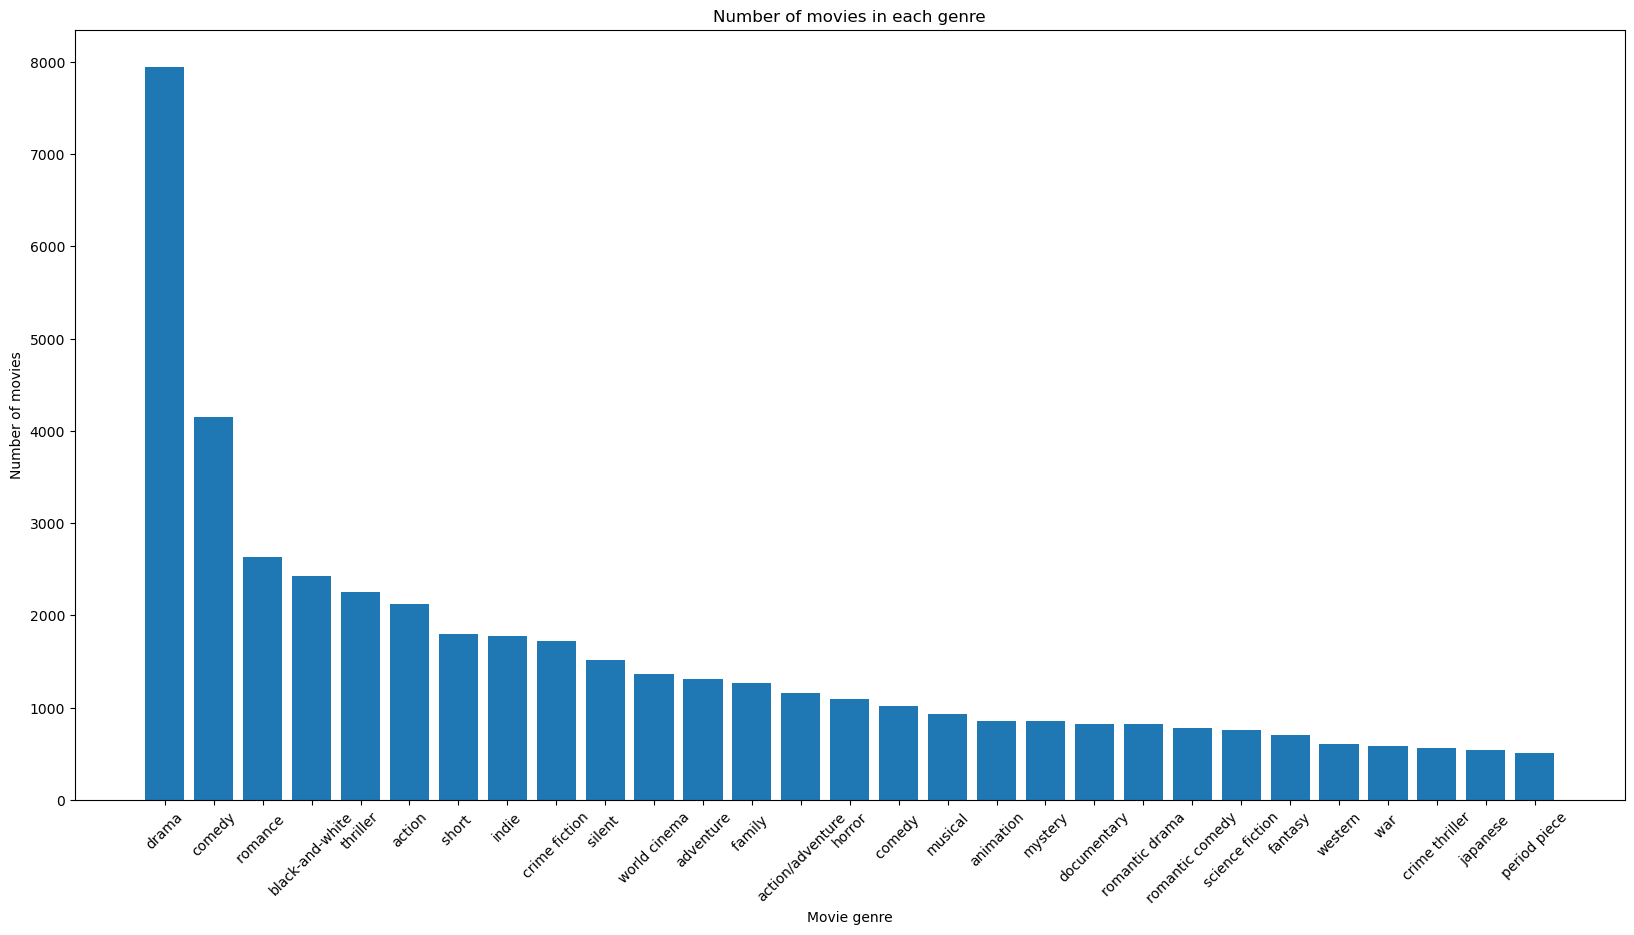

We created a new dataframe movies_genre, in which there is a row for each genre of one movie. We keep only the rows for which the genre is part of our list of genres of interest. After that we have a clean dataframe of our interest, ready to be analyzed.


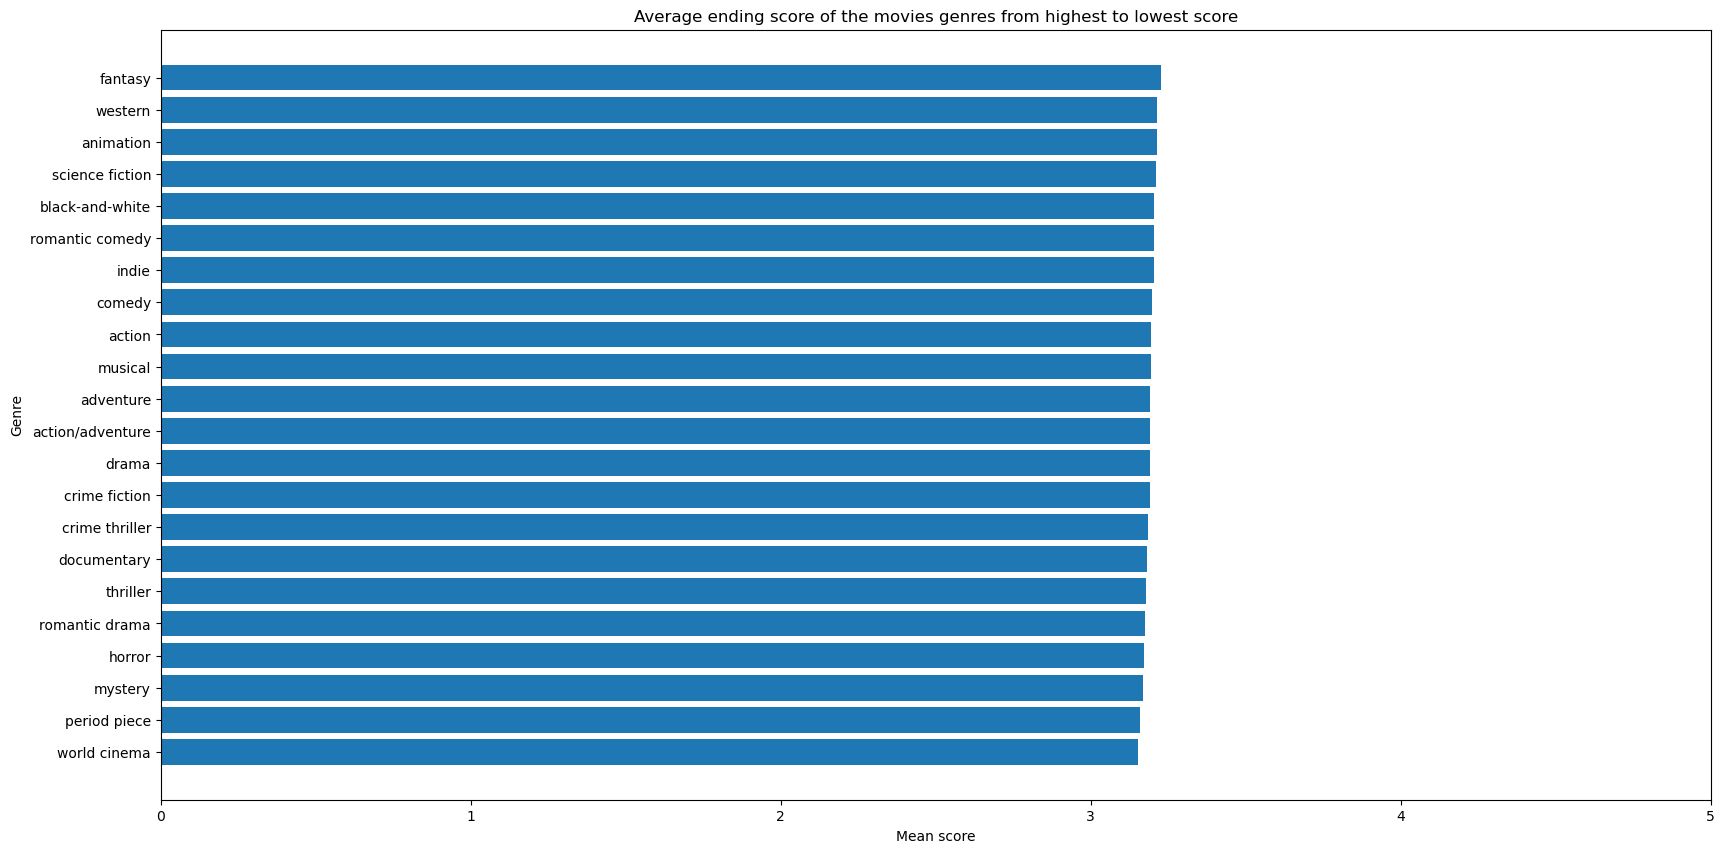

The 5 genres with the highest mean score are:
       Movie genres  Mean score  Number of movies
21          fantasy    3.227273               704
20          western    3.215107               609
19        animation    3.212369               857
18  science fiction    3.211286               762
17  black-and-white    3.205434              2429
The 5 genres with the lowest mean score are:
     Movie genres  Mean score  Number of movies
4  romantic drama    3.176185               823
3          horror    3.171402              1091
2         mystery    3.169213               851
1    period piece    3.157895               513
0    world cinema    3.153338              1363


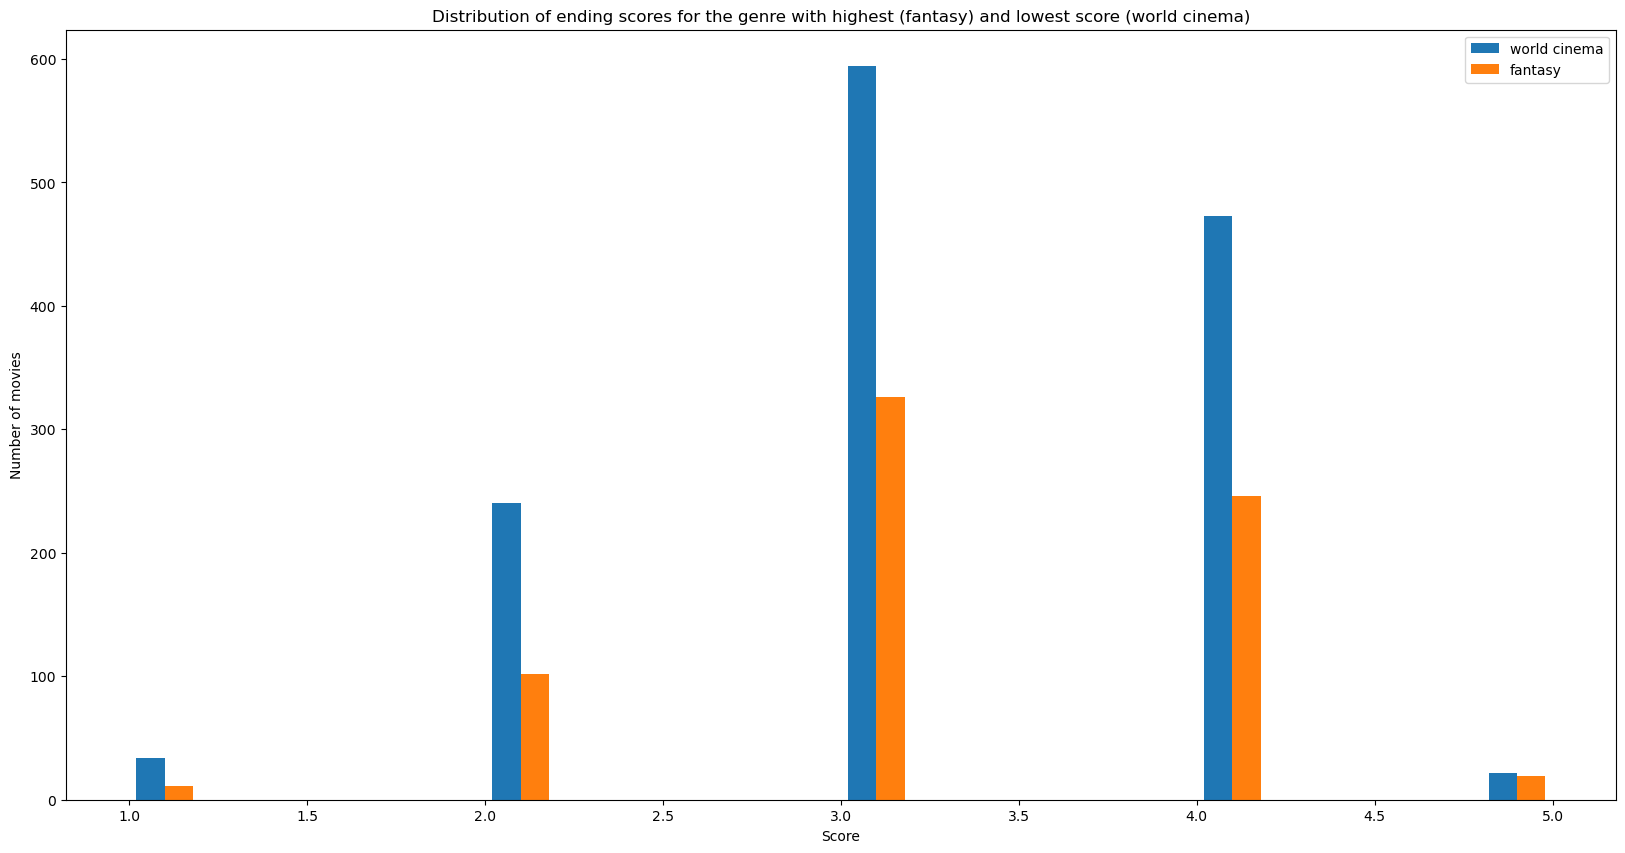

In [3]:
# %%
# Get rid of the rows with no score or no mov
movies = movies.dropna(subset=['Score'])

genre_counts = movies['Movie genres'].str.split(', ').explode().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Number of movies']
genre_counts = genre_counts.sort_values(by='Number of movies', ascending=False)
print("Number of genres:", len(genre_counts))

# %% [markdown]
# ## Cleaning and Filtering Movie Genres

# %% [markdown]
print("We observe that we have 333 different movie genres. We will keep only the most common ones (some genres have only one or a few films")

# %%

#Remove the string 'film' or 'Film' or 'films' or 'Films' or 'movies' or 'Movies' from the 'Genre' colum of the genre_counts df

genre_counts['Genre'] = genre_counts['Genre'].str.replace('film', '')
genre_counts['Genre'] = genre_counts['Genre'].str.replace('Film', '')
genre_counts['Genre'] = genre_counts['Genre'].str.replace('films', '')
genre_counts['Genre'] = genre_counts['Genre'].str.replace('Films', '')
genre_counts['Genre'] = genre_counts['Genre'].str.replace('movies', '')
genre_counts['Genre'] = genre_counts['Genre'].str.replace('Movies', '')


genre_counts = genre_counts[genre_counts['Number of movies'] > 500]

genre_counts['Genre'] = genre_counts['Genre'].str.lower()

print("Number of genres of our interest for our analysis: ", len(genre_counts))

# %%
# Plot the number of movies in each genre 
plt.figure(figsize=(20, 10))
plt.bar(genre_counts['Genre'], genre_counts['Number of movies'])
plt.xticks(rotation=45)
plt.xlabel('Movie genre')
plt.ylabel('Number of movies')
plt.title('Number of movies in each genre')
plt.show()

# %% [markdown]
# Now that we have cleaned, regrouped and selected the movie genres, we will create a new dataset with only the movies that have any of these genres of our interest. 

# %%
# Copy the movies dataframe into a new dataframe called movies_genres that has a row for each genre of each movie (with only the genres kept in genre counts)
movies_genres = movies.copy()
movies_genres = movies_genres.dropna(subset=['Movie genres'])
movies_genres['Movie genres'] = movies_genres['Movie genres'].str.split(', ')
movies_genres = movies_genres.explode('Movie genres')
movies_genres = movies_genres.reset_index(drop=True)
movies_genres['Movie genres'] = movies_genres['Movie genres'].str.lower()


# %%
# Remove the rows of the movies_genres dataframe that have a genre that is not in the genre_counts dataframe
movies_genres = movies_genres[movies_genres['Movie genres'].isin(genre_counts['Genre'])]
movies_genres = movies_genres.reset_index(drop=True)
movies_genres.head(10)
print("We created a new dataframe movies_genre, in which there is a row for each genre of one movie. We keep only the rows for which the genre is part of our list of genres of interest. After that we have a clean dataframe of our interest, ready to be analyzed.")
# %% [markdown]
# Now that we have clean data with only the most relevant genres for each film, we can anlayze it.

# %% [markdown]
# ## Analysis of the ending depending on the movie genres

# %% [markdown]
# First we can observe the mean score of ending for each movie genre.

# %%
# Mean ending score for each genre
genre_scores = movies_genres.groupby('Movie genres').agg({'Score': 'mean', 'Movie genres': 'count'})
genre_scores.columns = ['Mean score', 'Number of movies']
genre_scores = genre_scores.reset_index()
genre_scores = genre_scores.sort_values(by='Mean score', ascending=True)
genre_scores = genre_scores.reset_index(drop=True)

# Plot of the average score of the movie genres from best to worst ending score
plt.figure(figsize=(20, 10))
plt.barh(genre_scores['Movie genres'], genre_scores['Mean score'])
plt.xlim(0, 5)
plt.xlabel('Mean score')
plt.ylabel('Genre')
plt.title('Average ending score of the movies genres from highest to lowest score')
plt.show()

# %%
#Sort the genre_scores by mean score
genre_high_scores = genre_scores.sort_values(by='Mean score', ascending=False)

#Print the genre and score of the 5 genres with the highest mean score
print("The 5 genres with the highest mean score are:")
print(genre_high_scores.head(5))

#Print the 5 genres with the lowest mean score
print("The 5 genres with the lowest mean score are:")
print(genre_high_scores.tail(5))

#Distibution of the scores for the worst and best genres
worst_genre = genre_high_scores.tail(1)['Movie genres'].values[0]
best_genre = genre_high_scores.head(1)['Movie genres'].values[0]

worst_genre_scores = movies_genres[movies_genres['Movie genres'] == worst_genre]['Score']
best_genre_scores = movies_genres[movies_genres['Movie genres'] == best_genre]['Score']

#PLot a histogram where the x axis is the score from 1 to 5 and the y axis is the number of movies that have this score, but for each score I want two bars one for the worst genre and one for the best genre
plt.figure(figsize=(20, 10))
plt.hist([worst_genre_scores, best_genre_scores], bins=20, range=(1, 5), label=[worst_genre, best_genre])
plt.xlabel('Score')
plt.ylabel('Number of movies')
plt.title('Distribution of ending scores for the genre with highest (fantasy) and lowest score (world cinema)')
plt.legend()
plt.show()


We observe that the average ending score does vary from one genre to the other but the difference is not that important. 
Let's have a look at what genres have the five highest and five lowest ending scores.
We can then have a look at the distribution of th emovies per score for the highest ending score genre and the lowest ending score genre.

We observe that these 2 genres have similar distributions even if they differ in the numebr of films for each ending score (both genres have a three as the highest score, 4 as second most given and so on).

This can be either explained by the fact that we don't have enough movies in our cleaned dataset or that there can be many genres attributed to one movie. It can also be explained by the fact that our scoring method is not accurate or is biased (a lot of threes is understandable because it can be true that a lot of movies have neither a sad or happy ending, but there seems to be a lot of fours). Finally, it could be that there is no significant relationship between the genre of a movie and its ending.

To get more insight on this, we will perform some statistical tests to further explore if there is a relationship between the genre of a movie and its ending.

First, we perform can perform a CHi-square test, which is used to determine whether there is a significant association between two categorical variables. Using it, we can determine if the movie genres and the ending scores are related or not, since these two variables are categorical. 

Null Hypothesis: Movie genres and ending scores are independent.
Alternative Hypothesis: Movie genres and ending scores are not independent.

Chi-Square Statistic: 56.19273641471828
P-Value: 0.9915509089152793
Degrees of Freedom: 84


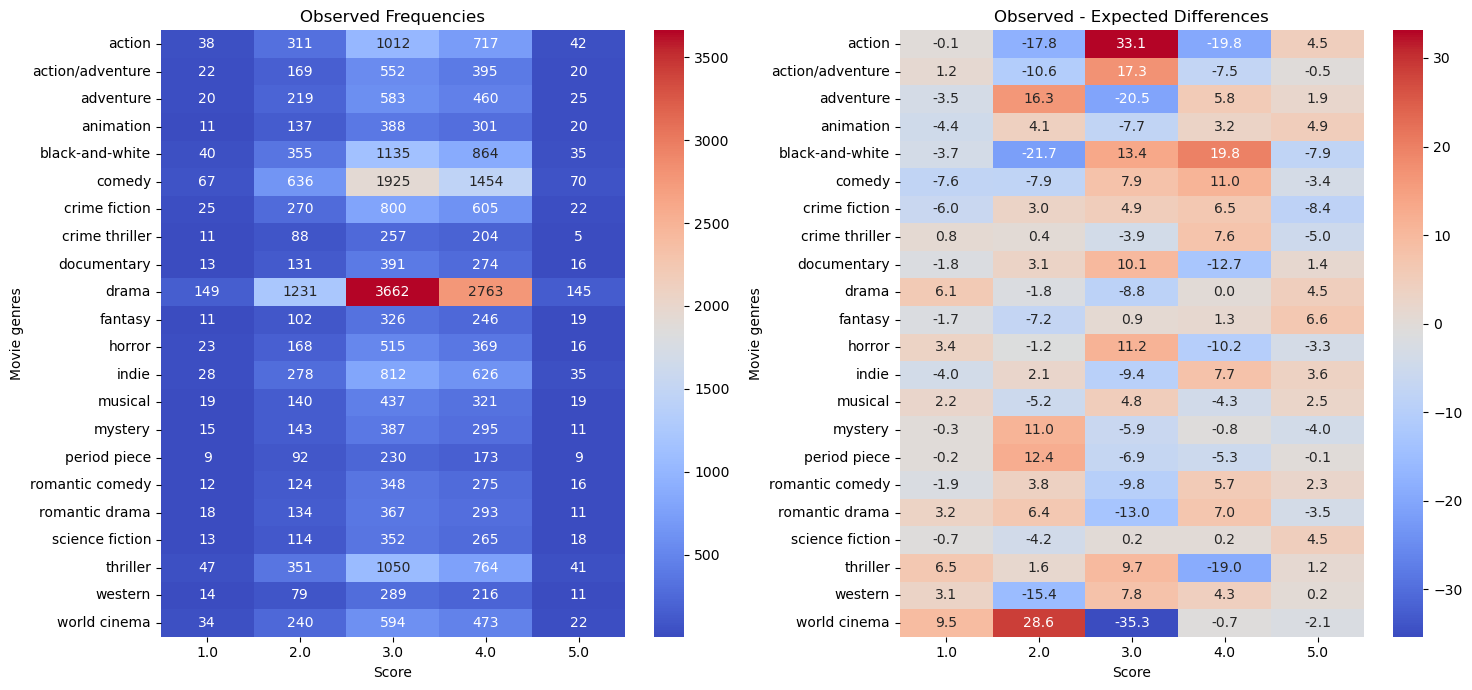

In [10]:
#Chi-square test
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

genre_score_counts = movies_genres.groupby(['Movie genres', 'Score']).size().unstack(fill_value=0)

chi2, p, dof, expected = chi2_contingency(genre_score_counts)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)

# Create subplots for two heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Heatmap of observed frequencies
sns.heatmap(genre_score_counts, annot=True, cmap="coolwarm", fmt="d", ax=axes[0])
axes[0].set_title("Observed Frequencies")

# Heatmap of differences (observed - expected)
sns.heatmap(genre_score_counts - expected, annot=True, cmap="coolwarm", fmt=".1f", ax=axes[1])
axes[1].set_title("Observed - Expected Differences")

plt.tight_layout()
plt.show()

To observe correlation, we cannnot really use spearman or pearson because they are not really suited for categorical data. We could maybe use a point - biserial correlation (special type of Pearson correlation) because it measures the relationship between a binary categorical variable (yes or no) and a continuous variable. We could use it for example in a case where we classifiy the genres such as action and no-action movies and see if there is a correlation in the average ending scores.

To see if there is a significant difference in the average ending score for all genres, we can perform an ANOVA test.
Null hypothesis: There is no significant difference in the movie scores across different genres
Alternative Hypothesis: There is a significant difference in the mean movie scores across different genres.

HOWEVER: 
1) ANOVA assumes normally distributed data and similar variances across groups. Looking at our distributions, we can make this assumption, but it is fragile.

2) ANOVA only tells us if there is a difference somewhere among the genres, not which specific genres differ.

For statistical dependency a t-test can also be done between 2 genres: we will perform one, to see if there is a significant difference in the ending score. In the next milestone, for a depper analysis we will perform t-tests for each pair of genres. 

In [4]:
# %%
# ANOVA test
from scipy.stats import f_oneway

# Create a dictionary to store ending scores for each genre
genre_groups = movies_genres.groupby('Movie genres')['Score'].apply(list)

# Use f_oneway to perform ANOVA across all genre groups
anova_result = f_oneway(*genre_groups)

print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

# %% [markdown]
# Interpretation: Since the p-value is very high, we cannot reject the null hypothesis. In other words, there isn't enough evidence to say that movie genres have a significant effect on the ending score.

# %% [markdown]
# T-TEST betwteen 2 genres

# %%
from scipy import stats

# Genres to compare
genre_1 = 'comedy'
genre_2 = 'horror'

# Extract scores for the movies that belong to each genre
genre_1_scores = movies_genres[movies_genres['Movie genres'] == genre_1]['Score']
genre_2_scores = movies_genres[movies_genres['Movie genres'] == genre_2]['Score']

# Perform a t-test between the two genres' scores
t_stat, p_value = stats.ttest_ind(genre_1_scores.dropna(), genre_2_scores.dropna())

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

ANOVA F-statistic: 0.5615409600441515
ANOVA p-value: 0.9450240445103344
T-statistic: 1.028198911156292
P-value: 0.30390371989259674


Interpretation: For both the ANOVA test and the t-test between two genres, since the p-value is very high, we cannot reject the null hypothesis. In other words, there isn't enough evidence to say that movie genres have a significant effect on the ending score.

### 2. Release date and Influence of historical events

### 3. Key personnel (actors, directors)

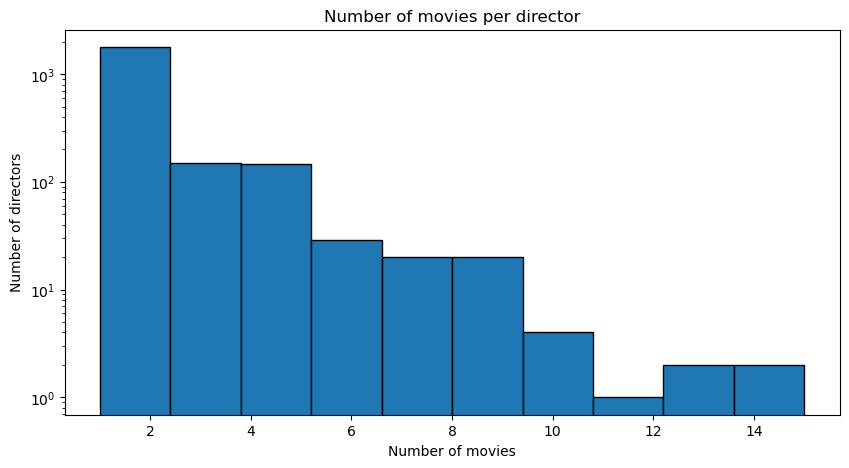

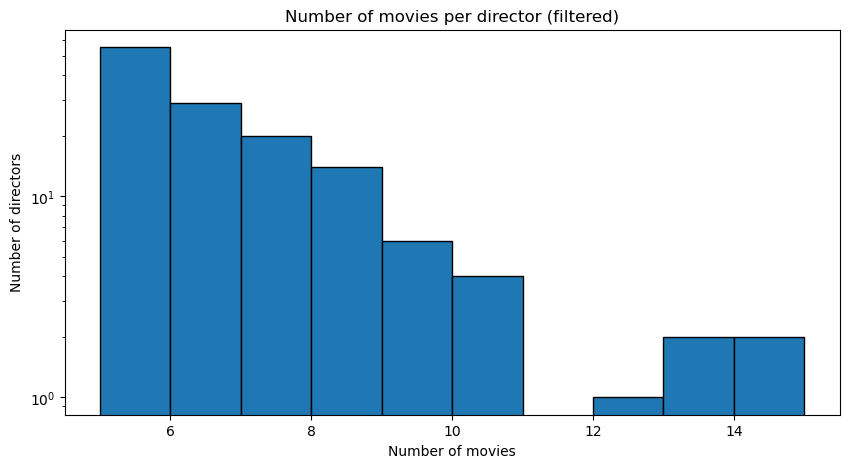

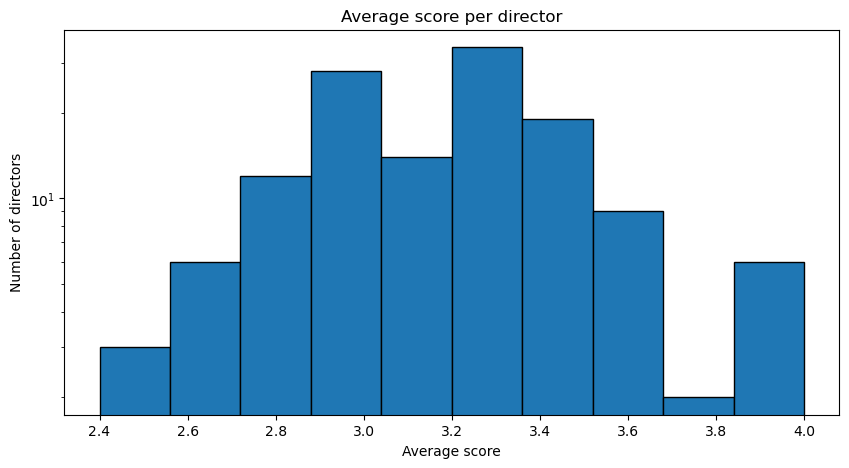

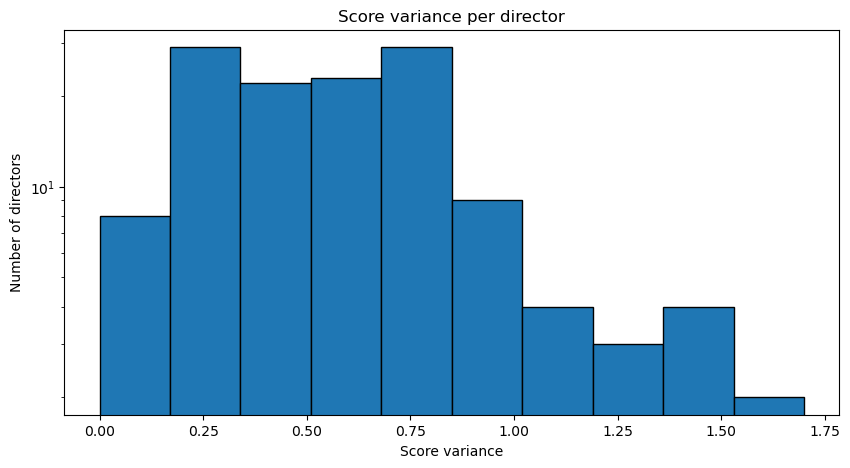

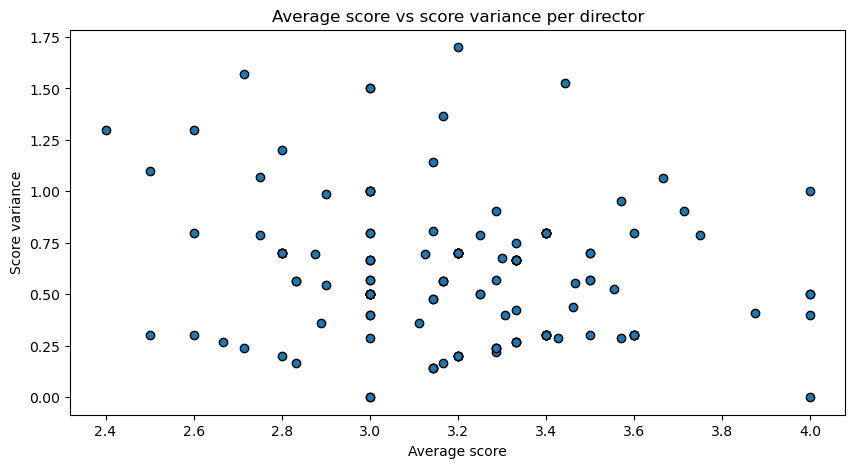

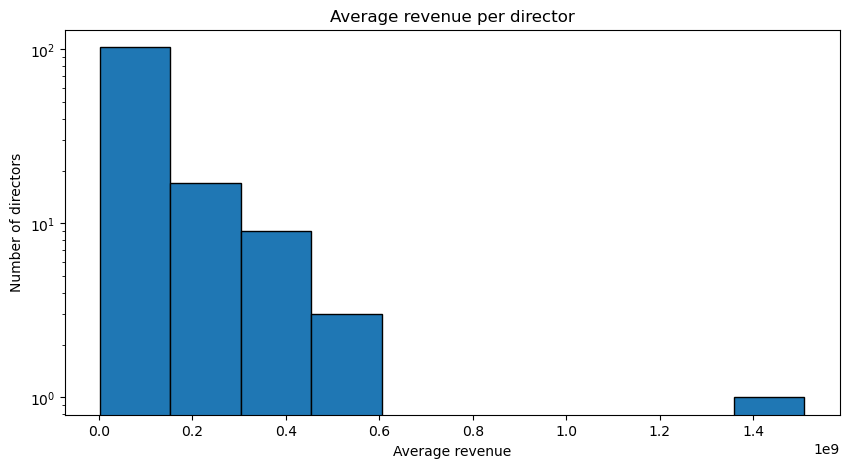

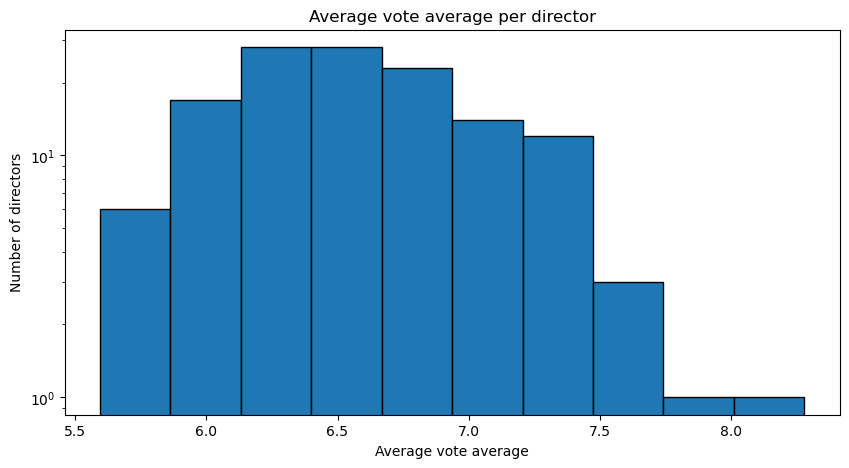

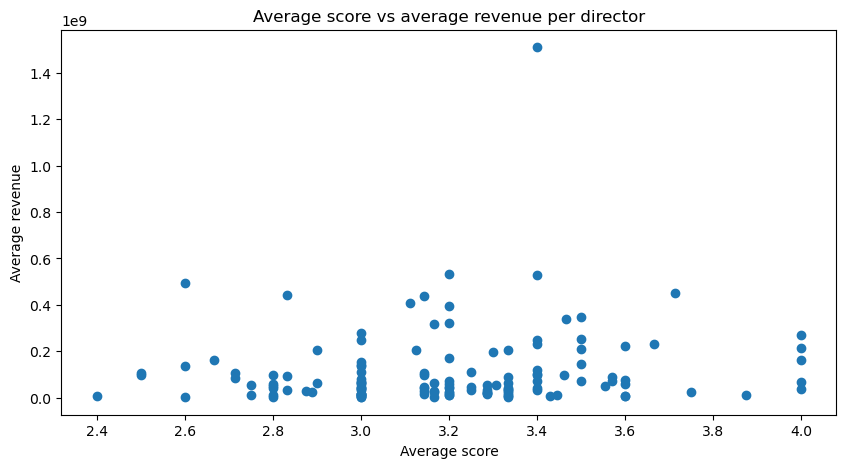

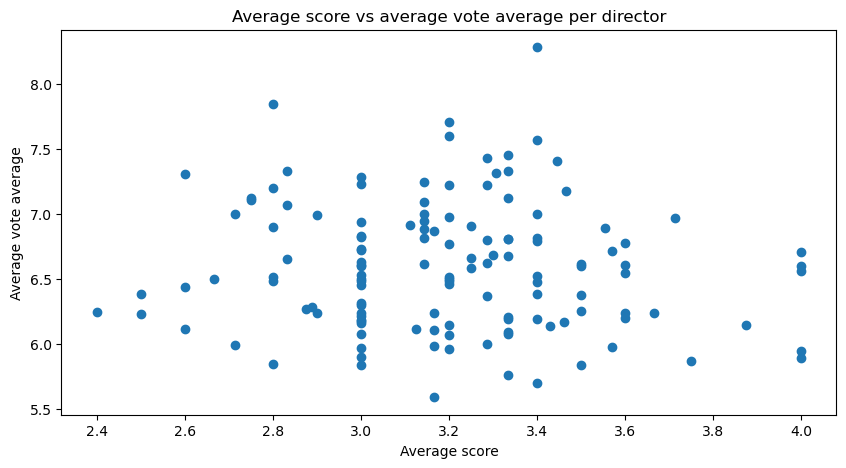

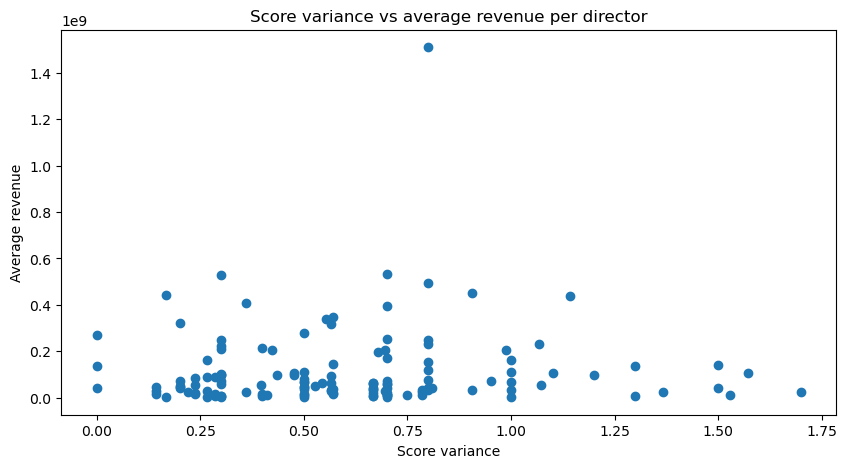

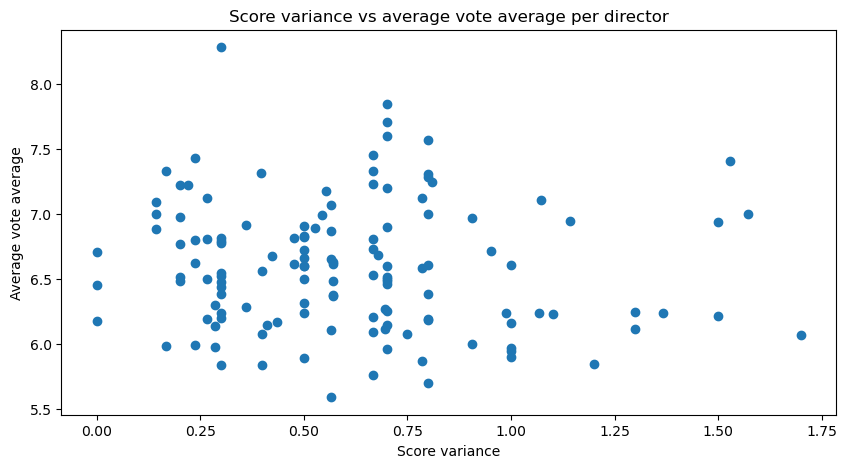

t stat: 2.279961155186647
p value: 0.02422599117351782
The average score is significantly different between directors with high and low revenue
t stat: -1.210075796758246
p value: 0.2284455167529968
The average score is not significantly different between directors with high and low vote average
t stat: -0.40556250776619396
p value: 0.6857256948927807
The score variance is not significantly different between directors with high and low revenue
t stat: -0.06539132155263837
p value: 0.9479628856482072
The score variance is not significantly different between directors with high and low vote average


KeyError: ['writer']

In [5]:
# %%
# drop movies without director
movies_filtered = movies.dropna(subset=['director'])

# drop movies without vote average or revenue
movies_filtered = movies_filtered.dropna(subset=['vote_average', 'revenue'])

# drop movies with revenue less than 1000
movies_filtered = movies_filtered[movies_filtered['revenue'] > 1000]

# %%
# count the number of movies per director
director_counts = movies_filtered['director'].value_counts()
director_counts

# %%
# plot the number of movies per director
plt.figure(figsize=(10, 5))
plt.hist(director_counts, edgecolor='black', log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of directors')
plt.title('Number of movies per director')
plt.show()

# %%
# filter out directors with more than 4 movies
directors = director_counts[director_counts > 4].index
movies_filtered = movies_filtered[movies_filtered['director'].isin(directors)]

# count the number of movies per director
director_counts_filtered = movies_filtered['director'].value_counts()
director_counts_filtered

# %%
# plot the number of movies per director
plt.figure(figsize=(10, 5))
plt.hist(director_counts_filtered, edgecolor='black', log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of directors')
plt.title('Number of movies per director (filtered)')
plt.show()

# %%
# count the number of movies per director, separated by the score of the movie
director_counts_filtered_score = movies_filtered.groupby(['director', 'Score']).size()
director_counts_filtered_score

# %%
# calculate the average score per director, and sort the directors by score
director_avg_score = movies_filtered.groupby('director')['Score'].mean()
director_avg_score = director_avg_score.sort_values(ascending=False)
director_avg_score

# %%
# plot the average score per director
plt.figure(figsize=(10, 5))
plt.hist(director_avg_score, edgecolor='black', log=True)
plt.xlabel('Average score')
plt.ylabel('Number of directors')
plt.title('Average score per director')
plt.show()


# %%
# calculate the score variance per director, and sort the directors by variance
director_score_variance = movies_filtered.groupby('director')['Score'].var()
director_score_variance = director_score_variance.sort_values(ascending=False)
director_score_variance

# %%
# plot the score variance per director
plt.figure(figsize=(10, 5))
plt.hist(director_score_variance, edgecolor='black', log=True)
plt.xlabel('Score variance')
plt.ylabel('Number of directors')
plt.title('Score variance per director')
plt.show()

# %%
# plot the average score vs the score variance per director
plt.figure(figsize=(10, 5))
x_values = director_avg_score.index
plt.scatter(director_avg_score, director_score_variance[x_values], edgecolor='black')
plt.xlabel('Average score')
plt.ylabel('Score variance')
plt.title('Average score vs score variance per director')
plt.show()

# %%
# calculate the average revenue per director, and sort the directors by revenue
director_avg_revenue = movies_filtered.groupby('director')['revenue'].mean()
director_avg_revenue = director_avg_revenue.sort_values(ascending=False)
director_avg_revenue

# %%
# plot the average revenue per director
plt.figure(figsize=(10, 5))
plt.hist(director_avg_revenue, edgecolor='black', log=True)
plt.xlabel('Average revenue')
plt.ylabel('Number of directors')
plt.title('Average revenue per director')
plt.show()

# %%
# calculate the average vote average per director, and sort the directors by vote average
director_avg_vote_average = movies_filtered.groupby('director')['vote_average'].mean()
director_avg_vote_average = director_avg_vote_average.sort_values(ascending=False)
director_avg_vote_average

# %%
# plot the average vote average per director
plt.figure(figsize=(10, 5))
plt.hist(director_avg_vote_average, edgecolor='black', log=True)
plt.xlabel('Average vote average')
plt.ylabel('Number of directors')
plt.title('Average vote average per director')
plt.show()

# %%
# analyze the correlation between the average score and the average revenue per director
plt.figure(figsize=(10, 5))
x_values = director_avg_score.index
plt.scatter(director_avg_score, director_avg_revenue[x_values])
plt.xlabel('Average score')
plt.ylabel('Average revenue')
plt.title('Average score vs average revenue per director')
plt.show()

# %%
# analyze the correlation between the average score and the average vote average per director
plt.figure(figsize=(10, 5))
x_values = director_avg_score.index
plt.scatter(director_avg_score, director_avg_vote_average[x_values])
plt.xlabel('Average score')
plt.ylabel('Average vote average')
plt.title('Average score vs average vote average per director')
plt.show()

# %%
# analyze the correlation between the score variance and the average revenue per director
plt.figure(figsize=(10, 5))
x_values = director_score_variance.index
plt.scatter(director_score_variance, director_avg_revenue[x_values])
plt.xlabel('Score variance')
plt.ylabel('Average revenue')
plt.title('Score variance vs average revenue per director')
plt.show()

# %%
# analyze the correlation between the score variance and the average vote average per director
plt.figure(figsize=(10, 5))
x_values = director_score_variance.index
plt.scatter(director_score_variance, director_avg_vote_average[x_values])
plt.xlabel('Score variance')
plt.ylabel('Average vote average')
plt.title('Score variance vs average vote average per director')
plt.show()

# %%
# use t test to check if the average score is significantly different between directors with high and low revenue
from scipy.stats import ttest_ind

high_revenue_directors = director_avg_revenue[director_avg_revenue > 0.2e9].index
low_revenue_directors = director_avg_revenue[director_avg_revenue < 0.2e9].index

high_revenue_director_avg_score = director_avg_score[high_revenue_directors].dropna()
low_revenue_director_avg_score = director_avg_score[low_revenue_directors].dropna()

t_stat, p_value = ttest_ind(high_revenue_director_avg_score, low_revenue_director_avg_score)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The average score is significantly different between directors with high and low revenue')
else:
    print('The average score is not significantly different between directors with high and low revenue')


# %%
# use t test to check if the average score is significantly different between directors with high and low vote average

high_vote_average_directors = director_avg_vote_average[director_avg_vote_average > 7].index
low_vote_average_directors = director_avg_vote_average[director_avg_vote_average < 7].index

high_vote_average_director_avg_score = director_avg_score[high_vote_average_directors].dropna()
low_vote_average_director_avg_score = director_avg_score[low_vote_average_directors].dropna()

t_stat, p_value = ttest_ind(high_vote_average_director_avg_score, low_vote_average_director_avg_score)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The average score is significantly different between directors with high and low vote average')
else:
    print('The average score is not significantly different between directors with high and low vote average')

# %%
# use t test to check if the score variance is significantly different between directors with high and low revenue

high_revenue_director_score_variance = director_score_variance[high_revenue_directors].dropna()
low_revenue_director_score_variance = director_score_variance[low_revenue_directors].dropna()

t_stat, p_value = ttest_ind(high_revenue_director_score_variance, low_revenue_director_score_variance)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The score variance is significantly different between directors with high and low revenue')
else:
    print('The score variance is not significantly different between directors with high and low revenue')

# %%
# use t test to check if the score variance is significantly different between directors with high and low vote average

high_vote_average_director_score_variance = director_score_variance[high_vote_average_directors].dropna()
low_vote_average_director_score_variance = director_score_variance[low_vote_average_directors].dropna()

t_stat, p_value = ttest_ind(high_vote_average_director_score_variance, low_vote_average_director_score_variance)
print('t stat:', t_stat)
print('p value:', p_value)

if p_value < 0.05:
    print('The score variance is significantly different between directors with high and low vote average')
else:
    print('The score variance is not significantly different between directors with high and low vote average')

# %%
# drop movies without writer
movies_filtered = movies.dropna(subset=['writer'])

# drop movies without vote average or revenue
movies_filtered = movies_filtered.dropna(subset=['vote_average', 'revenue'])

# drop movies with revenue less than 1000
movies_filtered = movies_filtered[movies_filtered['revenue'] > 1000]

# %%
# count the number of movies per writer
writer_counts = movies_filtered['writer'].value_counts()
writer_counts

# %%
# plot the number of movies per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_counts, edgecolor='black', log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of writers')
plt.title('Number of movies per writer')
plt.show()

# %%
# filter out writers with more than 4 movies
writers = writer_counts[writer_counts > 4].index
movies_filtered = movies_filtered[movies_filtered['writer'].isin(writers)]

# %%
# count the number of movies per writer
writer_counts_filtered = movies_filtered['writer'].value_counts()
writer_counts_filtered

# %%
# plot the number of movies per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_counts_filtered, edgecolor='black', log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of writers')
plt.title('Number of movies per writer (filtered)')
plt.show()

# %%
# count the number of movies per writer, separated by the score of the movie
writer_counts_filtered_score = movies_filtered.groupby(['writer', 'Score']).size()
writer_counts_filtered_score

# %%
# calculate the average score per writer, and sort the writers by score
writer_avg_score = movies_filtered.groupby('writer')['Score'].mean()
writer_avg_score = writer_avg_score.sort_values(ascending=False)
writer_avg_score

# %%
# plot the average score per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_avg_score, edgecolor='black')
plt.xlabel('Average score')
plt.ylabel('Number of writers')
plt.title('Average score per writer')
plt.show()

# %%
# calculate the score variance per writer, and sort the writers by variance
writer_score_variance = movies_filtered.groupby('writer')['Score'].var()
writer_score_variance = writer_score_variance.sort_values(ascending=False)
writer_score_variance

# %%
# plot the score variance per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_score_variance, edgecolor='black')
plt.xlabel('Score variance')
plt.ylabel('Number of writers')
plt.title('Score variance per writer')
plt.show()

# %%
# plot the score variance vs the average score per writer
plt.figure(figsize=(10, 5))
x_values = writer_avg_score.index
plt.scatter(writer_avg_score, writer_score_variance[x_values], edgecolor='black')
plt.xlabel('Average score')
plt.ylabel('Score variance')
plt.title('Average score vs score variance per writer')
plt.show()

# %%
# calculate the average revenue per writer, and sort the writers by revenue
writer_avg_revenue = movies_filtered.groupby('writer')['revenue'].mean()
writer_avg_revenue = writer_avg_revenue.sort_values(ascending=False)
writer_avg_revenue

# %%
# plot the average revenue per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_avg_revenue, edgecolor='black')
plt.xlabel('Average revenue')
plt.ylabel('Number of writers')
plt.title('Average revenue per writer')
plt.show()

# %%
# calculate the average vote average per writer, and sort the writers by vote average
writer_avg_vote_average = movies_filtered.groupby('writer')['vote_average'].mean()
writer_avg_vote_average = writer_avg_vote_average.sort_values(ascending=False)
writer_avg_vote_average

# %%
# plot the average vote average per writer
plt.figure(figsize=(10, 5))
plt.hist(writer_avg_vote_average, edgecolor='black')
plt.xlabel('Average vote average')
plt.ylabel('Number of writers')
plt.title('Average vote average per writer')
plt.show()

# %%
# analyze the correlation between the average score and the average revenue per writer
plt.figure(figsize=(10, 5))
x_values = writer_avg_score.index
plt.scatter(writer_avg_score, writer_avg_revenue[x_values])
plt.xlabel('Average score')
plt.ylabel('Average revenue')
plt.title('Average score vs average revenue per writer')
plt.show()

# %%
# analyze the correlation between the average score and the average vote average per writer
plt.figure(figsize=(10, 5))
x_values = writer_avg_score.index
plt.scatter(writer_avg_score, writer_avg_vote_average[x_values])
plt.xlabel('Average score')
plt.ylabel('Average vote average')
plt.title('Average score vs average vote average per writer')
plt.show()

# %%
# analyze the correlation between the score variance and the average revenue per writer
plt.figure(figsize=(10, 5))
x_values = writer_score_variance.index
plt.scatter(writer_score_variance, writer_avg_revenue[x_values])
plt.xlabel('Score variance')
plt.ylabel('Average revenue')
plt.title('Score variance vs average revenue per writer')
plt.show()

# %%
# analyze the correlation between the score variance and the average vote average per writer
plt.figure(figsize=(10, 5))
x_values = writer_score_variance.index
plt.scatter(writer_score_variance, writer_avg_vote_average[x_values])
plt.xlabel('Score variance')
plt.ylabel('Average vote average')
plt.title('Score variance vs average vote average per writer')
plt.show()

### 4. Influence of or on the movie's 'success'

Is there a correlation between a movie’s ending and its success (ratings, box office revenue, etc.)?

We will explore whether happy or tragic endings have any impact on a movie's popularity or financial performance.

To do so, we used the the tmdb dataset to augment our dataset and to provide the information of the box office revenue (more complete because in our own dataset we only had this information for ~10% of the movies) and the vote average, which is an average of the audience's rating on the movie. 

In [ ]:
# %%
# drop movies without vote average or revenue
movies_filtered = movies(subset=['vote_average', 'revenue'])

# drop movies with revenue less than 1000
movies_filtered = movies_filtered[movies_filtered['revenue'] > 1000]

# %%
# plot score vs revenue
plt.scatter(movies_filtered['Score'], movies_filtered['revenue'])
plt.xlabel('Score')
plt.ylabel('Revenue')
plt.title('Score vs Revenue')
plt.show()

# %%
# plot score vs vote average
plt.scatter(movies_filtered['Score'], movies_filtered['vote_average'])
plt.xlabel('Score')
plt.ylabel('Vote Average')
plt.title('Score vs Vote Average')
plt.show()


# %%
# calculate the average revenue for each score
average_revenue = movies_filtered.groupby('Score')['revenue'].mean()
average_revenue = average_revenue.sort_index()

# plot average revenue vs score
plt.plot(average_revenue)
plt.xlabel('Score')
plt.ylabel('Average Revenue')
plt.title('Average Revenue vs Score')
plt.show()

# %%
# calculate the average vote average for each score
average_vote_average = movies_filtered.groupby('Score')['vote_average'].mean()
average_vote_average = average_vote_average.sort_index()

# plot average vote average vs score
plt.plot(average_vote_average)
plt.xlabel('Score')
plt.ylabel('Average Vote Average')
plt.title('Average Vote Average vs Score')
plt.show()

# %%
# use t test to test if the average revenue is different for movies with score 1 and movies with score 5
from scipy.stats import ttest_ind

movies_score_1_revenue = movies_filtered[movies_filtered['Score'] == 1.0]['revenue'].astype(float)
movies_score_5_revenue = movies_filtered[movies_filtered['Score'] == 5.0]['revenue'].astype(float)

t_stat, p_value = ttest_ind(movies_score_1_revenue, movies_score_5_revenue)

print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('The difference is statistically significant')
else:
    print('The difference is not statistically significant')

# %%
# use t test to test if the average vote average is different for movies with score 1 and movies with score 5
movies_score_1_vote_average = movies_filtered[movies_filtered['Score'] == 1.0]['vote_average'].astype(float)
movies_score_5_vote_average = movies_filtered[movies_filtered['Score'] == 5.0]['vote_average'].astype(float)

t_stat, p_value = ttest_ind(movies_score_1_vote_average, movies_score_5_vote_average)

print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('The difference is statistically significant')
else:
    print('The difference is not statistically significant')

# %%

TypeError: 'DataFrame' object is not callable